In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load CSV file
df = pd.read_csv("/content/drive/MyDrive/House Price Prediction Dataset.csv")

print(df.head())
print(df.info())


   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Locat

In [3]:
# Check missing values
print(df.isnull().sum())

# Drop missing values (simple approach)
df.dropna(inplace=True)


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [8]:
# Input features and target
X = df[['Area', 'Bedrooms', 'Bathrooms']]
y = df['Price']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [18]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test_poly)


In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 79125084946.1204
R2 Score: -0.01704725445681743


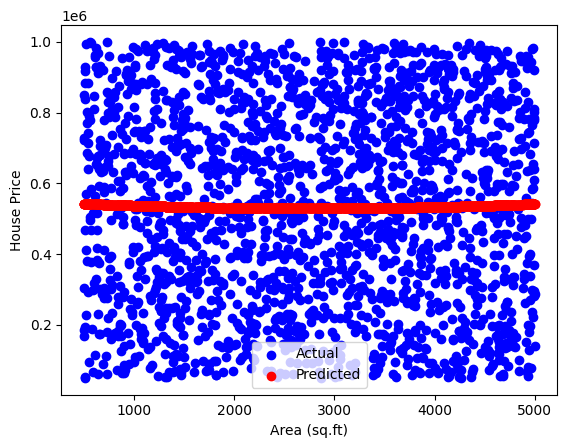

In [21]:
# For visualization use only Area feature

# Re-initialize and re-fit scaler and poly to ensure correct state
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# poly variable might also be in a bad state if not re-run, so re-initialize and fit it too
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)

# Create a DataFrame for plotting predictions, ensuring it has all original features
X_plot_input = pd.DataFrame()
X_plot_input['Area'] = df['Area']
# Use the mean values of Bedrooms and Bathrooms from the training data for constant values
X_plot_input['Bedrooms'] = X_train['Bedrooms'].mean()
X_plot_input['Bathrooms'] = X_train['Bathrooms'].mean()

# Scale the plotting input using the same scaler fitted on the training data
X_plot_input_scaled = scaler.transform(X_plot_input)

# Apply polynomial features to the scaled input using the same poly transformer
X_plot_input_poly = poly.transform(X_plot_input_scaled)

# Predict using the model
y_area_pred = model.predict(X_plot_input_poly)

plt.scatter(df['Area'], df['Price'], color='blue', label='Actual')
plt.scatter(df['Area'], y_area_pred, color='red', label='Predicted')
plt.xlabel("Area (sq.ft)")
plt.ylabel("House Price")
plt.legend()
plt.show()

In [23]:
# Example input
new_house = [[1200, 3, 2]]  # Area, Bedrooms, Bathrooms

new_house_scaled = scaler.transform(new_house)
new_house_poly = poly.transform(new_house_scaled)

predicted_price = model.predict(new_house_poly)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 538630.72271089


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
